# Convolutional Neural Network

### Importing the libraries

In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [2]:
tf.__version__

'2.6.0'

## Part 1 - Data Preprocessing

### Preprocessing the Training set

In [3]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 8000 images belonging to 2 classes.


### Preprocessing the Test set

In [4]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 2000 images belonging to 2 classes.


## Part 2 - Building the CNN

### Initialising the CNN

In [5]:
cnn = tf.keras.models.Sequential()

### Step 1 - Convolution

In [6]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

### Step 2 - Pooling

In [7]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Adding a second convolutional layer

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Step 3 - Flattening

In [9]:
cnn.add(tf.keras.layers.Flatten())

### Step 4 - Full Connection

In [10]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

### Step 5 - Output Layer

In [11]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the CNN

### Compiling the CNN

In [12]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the CNN on the Training set and evaluating it on the Test set

In [13]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 5)

Epoch 1/5
250/250 [==============================] - 205s 814ms/step - loss: 0.6590 - accuracy: 0.5944 - val_loss: 0.6028 - val_accuracy: 0.6715
Epoch 2/5
250/250 [==============================] - 83s 333ms/step - loss: 0.5888 - accuracy: 0.6862 - val_loss: 0.5970 - val_accuracy: 0.6820
Epoch 3/5
250/250 [==============================] - 82s 327ms/step - loss: 0.5420 - accuracy: 0.7221 - val_loss: 0.5085 - val_accuracy: 0.7570
Epoch 4/5
250/250 [==============================] - 87s 348ms/step - loss: 0.5159 - accuracy: 0.7469 - val_loss: 0.5109 - val_accuracy: 0.7460
Epoch 5/5
250/250 [==============================] - 86s 345ms/step - loss: 0.5017 - accuracy: 0.7580 - val_loss: 0.7130 - val_accuracy: 0.6520


## Part 4 - Making a single prediction

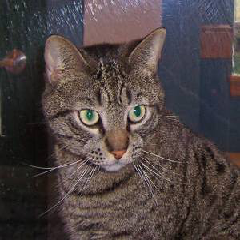

cat


In [21]:
import numpy as np
from keras.preprocessing import image
display(image.load_img('dataset/single_prediction/cat_or_dog_4.jpg', target_size = (240, 240)))
test_image = image.load_img('dataset/single_prediction/cat_or_dog_4.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  print("dog")
else:
  print("cat")
